Ejercicio 1

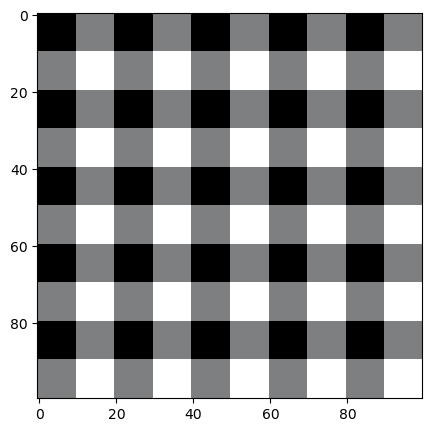

In [16]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

plt.rcParams['figure.figsize']=[10,5]

tamanio_img=100
R = np.ones((tamanio_img, tamanio_img)) * 255
G = np.ones((tamanio_img, tamanio_img)) * 255
B = np.ones((tamanio_img, tamanio_img)) * 255

imagen=np.dstack((R,G,B))
imagen=np.array(imagen,dtype=int)

for i in range(0,100,20):
    for j in range(0, 100, 20):
        for k in range(10):
            for l in range(10):
                imagen[k+i,l+j] = [1, 0, 0]
                
for i in range(0,100,20):
    for j in range(10, 100, 20):
        for k in range(10):
            for l in range(10):
                imagen[k+i,l+j] = [126, 127, 128]


for i in range(0,100,20):
    for j in range(10, 100, 20):
        for k in range(10):
            for l in range(10):
                imagen[k+j,l+i] = [126, 127, 128]

plt.figure()
plt.imshow(imagen)
plt.show()

Ejercicio 2

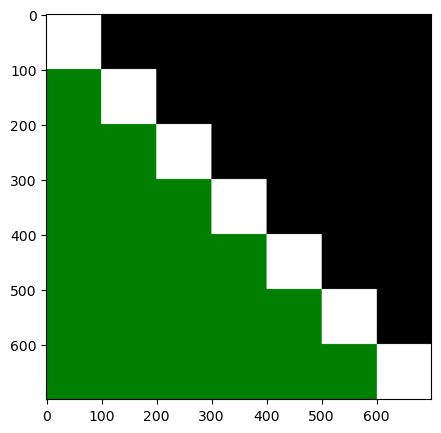

In [6]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

plt.rcParams['figure.figsize']=[10,5]

tamanio_img=700
R = np.ones((tamanio_img, tamanio_img)) * 0
G = np.ones((tamanio_img, tamanio_img)) * 0
B = np.ones((tamanio_img, tamanio_img)) * 0

imagen=np.dstack((R,G,B))
imagen=np.array(imagen,dtype=int)

for i in range(0,700,100):
    for j in range(0, 700, 100):
        for k in range(100):
            for l in range(100):
                if(j ==i):
                    imagen[k+i,l+j] = [255, 255, 255]
                elif (j+100<i+100): imagen[k+i,l+j] = [0, 127, 0]
                elif (i-j==70): imagen[k+i,l+j] = [0, 0, 254]
                


plt.figure()
plt.imshow(imagen)
plt.show()

Ejercicio 3

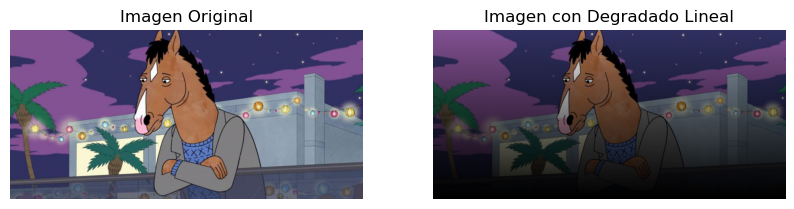

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('imgExamen.jpg')  
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)  

height, width, channels = imagen.shape

mask = np.linspace(1, 0, height).reshape(height, 1)
imagen_degradada = np.zeros_like(imagen, dtype=np.uint8)
for c in range(3):  
    imagen_degradada[:, :, c] = np.uint8(imagen[:, :, c] * mask)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen)
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_degradada)
plt.title("Imagen con Degradado Lineal")
plt.axis('off')

plt.show()


Ejercicio 4

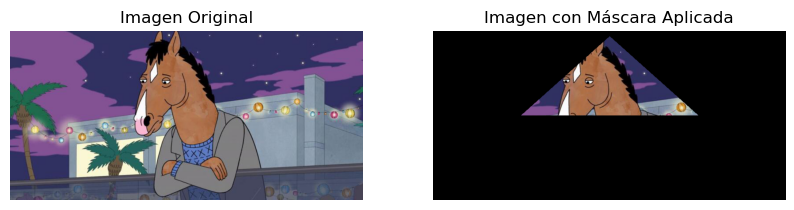

In [117]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread("imgExamen.jpg") 
altura, ancho = imagen.shape[:2]

mascara = np.zeros((altura, ancho), dtype=np.uint8)

puntos = np.array([[ancho//2, altura//26], [3*ancho//4, 3*altura//6], [ancho//4, 3*altura//6]], np.int32)

cv2.fillPoly(mascara, [puntos], 255)

resultado = cv2.bitwise_and(imagen, imagen, mask=mascara)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(resultado, cv2.COLOR_BGR2RGB))
plt.title("Imagen con Máscara Aplicada")
plt.axis("off")

plt.show()


Ejercicio 5

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random



